In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import random

In [5]:
def get_model():
  model = Sequential()
  model.add(Dense(8, input_dim=2, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

def min_max_normalize(series):
  return (series - series.min()) / (series.max()-series.min())

# Prepare the Data

In [6]:
df = pd.read_csv('places.csv')
df = min_max_normalize(df)
#shuffel the places
df = df.sample(frac=1)


#df['notMatch'] = [int (not isMatch) for isMatch in df['isMatch']]
inputMatrix = df[['lat', 'lng']].as_matrix()
target = df['isMatch'].as_matrix()

df.describe()

,lat,lng,heading,isMatch
count,167.000000,167.000000,167.000000,167.000000
mean,0.562436,0.508188,0.255711,0.227545
std,0.276931,0.286461,0.308861,0.420508
min,0.000000,0.000000,0.000000,0.000000
25%,0.332711,0.271068,0.102099,0.000000
50%,0.580796,0.464653,0.145865,0.000000
75%,0.793114,0.759367,0.221285,0.000000
max,1.000000,1.000000,1.000000,1.000000


# Train the Model

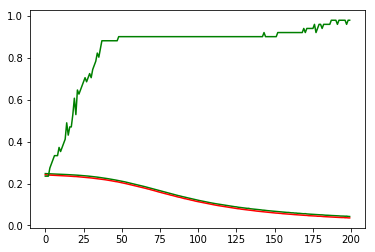

Accuracy: 98.04%


In [20]:
model = get_model()

weights = {0: df.isMatch.mean(), 1: 1 - df.isMatch.mean()}

training_data = model.fit(inputMatrix, target, validation_split=0.3, epochs=200, batch_size=10, class_weight=weights, verbose=False)
plt.plot(training_data.history['val_loss'], 'g', training_data.history['loss'], 'r', training_data.history['val_acc'], 'g')
plt.show()

print('Accuracy: %.2f%%' % (training_data.history['val_acc'][-1]*100))

# Measure Performance
K-Fold Cross Validation

In [12]:
estimator = KerasClassifier(build_fn=get_model, epochs=200, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, inputMatrix, target, cv=kfold)
print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Results: 98.81% (1.46%)
